# Tutorial 1.1 - ODE Solution of a Bimolecular Reaction

### We start off by examining a simple bimolecular reaction system considering the traditional continuous, deterministic solution to the ODE.

In [8]:
# Import Standard Python Libraries
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Constants
V  = 1.0e-15    # L
NA = 6.022e23   # molecules/mole
tstart =  0.0   # s
tend   = 30.0   # s

In [10]:
# Rates in terms of molecules and seconds
kf=1.07e5/(NA*V) # /molecule/s
kr=0.351         # /s

In [11]:
# Initial Species Counts
A  = 1000
B  = 1000
C  = 0
S0 = [A, B, C]

<h2> Reaction System </h2>
<h3> Reaction Form </h3>
<br/>
$A + B \xrightarrow{k_f} C$
<br/>
$C \xrightarrow{k_r} A + B $
<h3> Rate Form </h3>
<br/>
$\frac{dA}{dt} = \frac{dB}{dt} = -\frac{dC}{dt} = -k_f\cdot  A\cdot B + k_r\cdot  C$

In [12]:
# Definition of ODEs
def ds_dt(s, t):
    Ai = s[0]
    Bi = s[1]
    Ci = s[2]
    # Rate equations
    dA_dt = -kf*Ai*Bi + kr*Ci
    dB_dt = -kf*Ai*Bi + kr*Ci
    dC_dt =  kf*Ai*Bi - kr*Ci
    return [dA_dt, dB_dt, dC_dt]

## Solve using SciPy ODE Integrator
    
See the [Scipy Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)

In [13]:
# Solve
t    = np.linspace(tstart, tend, 1000000)
soln = spi.odeint(ds_dt, S0, t)

## Plot using Matplotlib

See the [Matplotlib Documentation](https://matplotlib.org/stable/api/pyplot_summary.html)

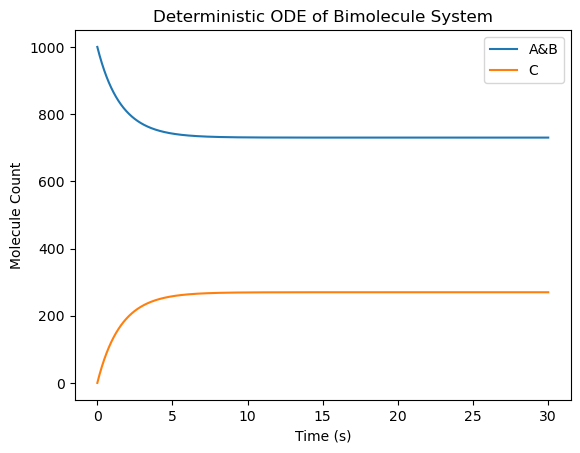

In [25]:
# Plot
plt.figure()
plt.plot(t, soln[:,0], label="A&B")
plt.plot(t, soln[:,2], label="C")
plt.xlabel('Time (s)')
plt.ylabel('Molecule Count')
plt.title('Deterministic ODE of Bimolecule System')
plt.legend()
plt.savefig('./plots_bimolecule/bimolecule_ODE.png')
plt.show()